# STOCHASTIC FRONTIER ANALYSIS OF REGIONAL COMPETITIVENESS
According to the OECD, a competitive region is one that can attract and maintain successful firms and maintain or increase standards of living for the region’s inhabitants. Skilled labour and investment gravitate away from “uncompetitive” regions towards more competitive ones. 

The extension of the competitiveness concept to the regional level is recent but is having a major influence on the direction of regional development policy. The increasing importance of competitiveness issues may be explained by the deeper economic integration and increased globalization, which require a constant increase in the competitive power of every economic entity belonging to a certain country.

In this project, we will use stochastic frontier analysis (SFA) to measure the regional competitiveness of federal subjects in the Central Federal District of Russia in the spirit of "Stochastic frontier analysis of regional competitiveness" by Furková and Surmanová (2011).

The frontier production technology can be estimated by many different models that are all nested in the general specification: 

$$ lny_{kt} = lnf(x_{kt}, t, k) − u_{kt} + v_{kt},$$

where y is output, x is a set of inputs, the subscript k = 1, . . . ,K indicates the region and the subscript t = 1, . . . , T indicates the time period.

We assume the same frontier for all regions, i.e. $f(x_{kt}, t, k) = f(x_{kt}, t)$ $\forall$ $k, t$, but we will apply different specifications for $u_{kt}$. As for $f$, we will use the Cobb–Douglas production function.

Our data is a balanced panel data set of 18 regions observed over a period from 2004 to 2015, which includes 216 observations in total. The output is measured by gross regional product (GRP), and for the inputs we will use three variables:
1. ER - employment rate (in %);
2. INV - investments in fixed assets (in % of GRP);
3. INC - income (in % of GRP).

All data was taken from Rosstat and was adjusted for inflation where necessary.

In [4]:
library(hrbrthemes)
library(ggplot2)
library(tidyverse)
options(warn = -1)
library(readxl)
library(stargazer)
library(IRdisplay)
library(plm)
library(frontier)
library(broom)
library(reshape2)
library(texreg)
theme_set(theme_ipsum_rc())
oldw <- getOption("warn")
options(repr.plot.width  = 14,
        repr.plot.height = 6)

In [5]:
df = read_excel('data.xlsx')

In [6]:
print(df)

# A tibble: 216 x 7
   ID               TIME TIMED     GDP   INV    ER    INC
   <chr>           <dbl> <dbl>   <dbl> <dbl> <dbl>  <dbl>
 1 Belgorod oblast  2004     1 162471.  19.8  59    8741.
 2 Belgorod oblast  2005     2 172700.  24.2  57.5  9500.
 3 Belgorod oblast  2006     3 184817.  28.8  60.6 11074.
 4 Belgorod oblast  2007     4 214622.  34.6  59.2 12912.
 5 Belgorod oblast  2008     5 242883.  32.8  61.3 14848.
 6 Belgorod oblast  2009     6 227285.  24    62.9 16154.
 7 Belgorod oblast  2010     7 260016.  24.2  61.6 16993 
 8 Belgorod oblast  2011     8 285565.  24.8  61.4 16219.
 9 Belgorod oblast  2012     9 280413.  25.1  63.7 17129.
10 Belgorod oblast  2013    10 276754.  22.7  65.4 17808.
# ... with 206 more rows


In [7]:
df_summary = display_html(
    paste(
        invisible(
            capture.output(
                stargazer(as.data.frame(df[,-c(1,2)]), type='html'))),
        collapse=""))


Statistic N Mean St. Dev. Min Pctl(25) Pctl(75) Max TIMED 216 6.500 3.460 1 3.8 9.2 12 GDP 216 196,298.800 138,979.300 72,095.240 131,450.700 199,640.500 855,125.000 INV 216 25.002 6.952 8.600 20.675 28.725 44.100 ER 216 63.347 3.515 53 61.0 65.8 74 INC 216 14,997.320 7,349.449 6,133.256 11,173.370 15,621.390 45,768.210

In [8]:
df_panel = pdata.frame(df, c('ID', 'TIMED'))
summary(df_panel)

               ID           TIME          TIMED          GDP        
 Belgorod oblast: 12   Min.   :2004   1      : 18   Min.   : 72095  
 Bryansk oblast : 12   1st Qu.:2007   2      : 18   1st Qu.:131451  
 Ivanovo oblast : 12   Median :2010   3      : 18   Median :160965  
 Kaluga oblast  : 12   Mean   :2010   4      : 18   Mean   :196299  
 Kostroma oblast: 12   3rd Qu.:2012   5      : 18   3rd Qu.:199641  
 Kursk oblast   : 12   Max.   :2015   6      : 18   Max.   :855125  
 (Other)        :144                  (Other):108                   
      INV              ER             INC       
 Min.   : 8.60   Min.   :52.80   Min.   : 6133  
 1st Qu.:20.68   1st Qu.:60.98   1st Qu.:11173  
 Median :24.80   Median :63.25   Median :13680  
 Mean   :25.00   Mean   :63.35   Mean   :14997  
 3rd Qu.:28.73   3rd Qu.:65.83   3rd Qu.:15621  
 Max.   :44.10   Max.   :74.00   Max.   :45768  
                                                

In [9]:
df_panel$TIME_ADJ = df_panel$TIME- mean(df_panel$TIME)
mean(df_panel$TIME_ADJ )

[1] 0

### Time-invariant efficiencies

We start the investigation of regional competitiveness assuming time-invariant individual efficiencies, i.e., $u_{kt} = u_k$ $\forall$ $k, t$, meaning that each region has an individual fixed efficiency that remains constant over time. First, we estimate the model without technological change.

In [10]:
 # Model 1
time_inv_no_change  <-  sfa(log(GDP) ~ log(ER) + log(INV) + log(INC) , data=df_panel)
summary(time_inv_no_change)


Error Components Frontier (see Battese & Coelli 1992)
Inefficiency decreases the endogenous variable (as in a production function)
The dependent variable is logged
Iterative ML estimation terminated after 26 iterations:
log likelihood values and parameters of two successive iterations
are within the tolerance limit

final maximum likelihood estimates
              Estimate Std. Error  z value  Pr(>|z|)    
(Intercept)  4.2057844  0.7071842   5.9472 2.727e-09 ***
log(ER)      0.6830711  0.1966849   3.4729 0.0005148 ***
log(INV)    -0.0015101  0.0265074  -0.0570 0.9545698    
log(INC)     0.6021309  0.0326723  18.4294 < 2.2e-16 ***
sigmaSq      0.5800077  0.2045320   2.8358 0.0045714 ** 
gamma        0.9889079  0.0041476 238.4305 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
log likelihood value: 187.6895 

panel data
number of cross-sections = 18 
number of time periods = 12 
total number of observations = 216 
thus there are 0 observations not in the 

As in Furková and Surmanová the elasticity of investments is negative, though in our first model it's not statistically significant. 

In [42]:
lrtest(time_inv_no_change)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
5,58.60167,NA,NA,NA
6,187.68946,1,258.1756,2.143736e-58


The likelihood ratio test shows that the OLS model is strongly rejected in favor of the corresponding stochastic frontier model.

So far we have assumed that the inefficiency term u follows a positive half-normal distribution, i.e. $u \sim N^+(\mu, \sigma^2_u)$, where $\mu = 0$. Another assumption we can make in SFA is that $\mu \neq 0$, meaning that u follows a positive truncated normal distribution.


In [37]:
 # Model 2
time_inv_no_change_tn  <-  sfa(log(GDP) ~ log(ER) + log(INV) + log(INC), truncNorm = TRUE, data=df_panel)
summary(time_inv_no_change_tn)

Error Components Frontier (see Battese & Coelli 1992)
Inefficiency decreases the endogenous variable (as in a production function)
The dependent variable is logged
Iterative ML estimation terminated after 10 iterations:
cannot find a parameter vector that results in a log-likelihood value
larger than the log-likelihood value obtained in the previous step

final maximum likelihood estimates
             Estimate Std. Error z value  Pr(>|z|)    
(Intercept)  3.605423   1.028493  3.5055 0.0004557 ***
log(ER)      0.654440   0.276513  2.3668 0.0179445 *  
log(INV)    -0.075095   0.030764 -2.4410 0.0146468 *  
log(INC)     0.683242   0.030566 22.3529 < 2.2e-16 ***
sigmaSq      0.050262   0.010455  4.8075 1.529e-06 ***
gamma        0.851423   0.025718 33.1066 < 2.2e-16 ***
mu           0.413735   0.077559  5.3344 9.585e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
log likelihood value: 185.1785 

panel data
number of cross-sections = 18 
number of time periods = 

In [43]:
lrtest(time_inv_no_change_tn, time_inv_no_change)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
7,185.1785,NA,NA,NA
6,187.6895,-1,5.021845,0.02502948


The investments coefficient is statistically significant at the 5% level, but the likelihood ratio test favours the model where u follows a positive half-normal distribution. In what follows, we will only use the latter assumption.

Now, we will add a time trend variable to our model to account for the technological change.

In [38]:
 # Model 3
time_inv  <-  sfa(log(GDP) ~ log(ER) + log(INV) + log(INC) + TIME_ADJ, data=df_panel)
summary(time_inv)

Error Components Frontier (see Battese & Coelli 1992)
Inefficiency decreases the endogenous variable (as in a production function)
The dependent variable is logged
Iterative ML estimation terminated after 35 iterations:
cannot find a parameter vector that results in a log-likelihood value
larger than the log-likelihood value obtained in the previous step

final maximum likelihood estimates
             Estimate Std. Error  z value  Pr(>|z|)    
(Intercept) 6.2055441  1.1874433   5.2260 1.732e-07 ***
log(ER)     0.4578596  0.2212112   2.0698  0.038472 *  
log(INV)    0.0153537  0.0285254   0.5382  0.590405    
log(INC)    0.5006629  0.0593914   8.4299 < 2.2e-16 ***
TIME_ADJ    0.0077347  0.0038845   1.9912  0.046461 *  
sigmaSq     0.8383148  0.3233953   2.5922  0.009536 ** 
gamma       0.9927031  0.0029876 332.2729 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
log likelihood value: 189.4071 

panel data
number of cross-sections = 18 
number of time pe

In [18]:
lrtest(time_inv_no_change, time_inv)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
6,187.6895,NA,NA,NA
7,189.4071,1,3.435359,0.06381472


The time trend is statistically significant at the 5% level, but with the likelihood ratio test we can’t reject 
the hypothesis that there is no technological change.

## Time-variant efficiencies

Next, we estimate the Cobb-Douglas production frontier with time-variant individual efficiencies, with $u_{kt} = u_{k}exp(−\eta(t − T))$  $\forall k, t$, which means that each region has an individual efficiency and the inefficiency terms $u_{kt}$ of all regions can change over time as indicated by the additional coefficient $\eta$. This function does not allow a change in the rank ordering of units over time, the unit that is ranked n-th at the first period is always ranked n-th.

In [39]:
 # Model 4
time_var_no_change = sfa(log(GDP) ~ log(ER) + log(INV) + log(INC), data=df_panel, timeEffect = TRUE)
summary(time_var_no_change)

Error Components Frontier (see Battese & Coelli 1992)
Inefficiency decreases the endogenous variable (as in a production function)
The dependent variable is logged
Iterative ML estimation terminated after 32 iterations:
cannot find a parameter vector that results in a log-likelihood value
larger than the log-likelihood value obtained in the previous step

final maximum likelihood estimates
             Estimate Std. Error  z value  Pr(>|z|)    
(Intercept) 6.6535515  1.1738043   5.6684 1.442e-08 ***
log(ER)     0.4730398  0.2103497   2.2488  0.024524 *  
log(INV)    0.0168783  0.0277993   0.6072  0.543751    
log(INC)    0.4522215  0.0673814   6.7114 1.928e-11 ***
sigmaSq     0.8351784  0.3103799   2.6908  0.007128 ** 
gamma       0.9928351  0.0028416 349.3980 < 2.2e-16 ***
time        0.0108887  0.0035067   3.1051  0.001902 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
log likelihood value: 190.5478 

panel data
number of cross-sections = 18 
number of time pe

In [20]:
lrtest(time_inv_no_change, time_var_no_change)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
6,187.6895,NA,NA,NA
7,190.5478,1,5.716581,0.01680543


In this specification, all the coefficients, except the coefficient of investments, are statistically significant at the 5% level. A positive sign of the coefficients $\eta$ (named time) indicates that efficiency is increasing over time.

Finally, we estimate the same model with the technological change.

In [40]:
 # Model 5
time_var = sfa(log(GDP) ~ log(ER) + log(INV) + log(INC) + TIME_ADJ, data=df_panel, timeEffect = TRUE)
summary(time_var)

Error Components Frontier (see Battese & Coelli 1992)
Inefficiency decreases the endogenous variable (as in a production function)
The dependent variable is logged
Iterative ML estimation terminated after 41 iterations:
log likelihood values and parameters of two successive iterations
are within the tolerance limit

final maximum likelihood estimates
             Estimate Std. Error  z value  Pr(>|z|)    
(Intercept) 6.7871392  1.2192017   5.5669 2.594e-08 ***
log(ER)     0.4491382  0.2289343   1.9619  0.049778 *  
log(INV)    0.0181523  0.0274032   0.6624  0.507703    
log(INC)    0.4489011  0.0638000   7.0361 1.977e-12 ***
TIME_ADJ    0.0017087  0.0050233   0.3401  0.733746    
sigmaSq     0.8609696  0.3139490   2.7424  0.006099 ** 
gamma       0.9930624  0.0027319 363.5056 < 2.2e-16 ***
time        0.0094542  0.0054555   1.7330  0.083103 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
log likelihood value: 190.5957 

panel data
number of cross-sections = 18 
n

In [22]:
lrtest(time_var, time_var_no_change)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
8,190.5957,NA,NA,NA
7,190.5478,-1,0.09597083,0.7567195


The time trend is statistically insignificant, and the the corresponding likelihood ratio test indicates that the effect of time on the efficiencies is insignificant.

Let's look at the resulting efficiencies from Model 4.

In [41]:
eff  <- data.frame(efficiencies(time_var_no_change))
colnames(eff) <- as.list(unique(df['TIME']))$TIME
eff  <- eff[order(-eff['2015']),]
eff


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Moscow,0.9734184,0.9737008,0.9739803,0.9742569,0.9745305,0.9748014,0.9750694,0.9753346,0.9755970,0.9758567,0.9761137,0.9763680
Belgorod oblast,0.5169623,0.5206678,0.5243593,0.5280366,0.5316995,0.5353478,0.5389812,0.5425996,0.5462027,0.5497903,0.5533623,0.5569185
Lipetsk oblast,0.4992584,0.5030268,0.5067824,0.5105249,0.5142542,0.5179698,0.5216717,0.5253595,0.5290331,0.5326922,0.5363366,0.5399661
Moscow Oblast,0.4354000,0.4393371,0.4432666,0.4471881,0.4511013,0.4550058,0.4589014,0.4627876,0.4666641,0.4705306,0.4743867,0.4782322
Yaroslavl oblast,0.4189594,0.4229241,0.4268827,0.4308350,0.4347805,0.4387188,0.4426496,0.4465725,0.4504872,0.4543932,0.4582903,0.4621781
Kaluga oblast,0.3704010,0.3744053,0.3784088,0.3824111,0.3864118,0.3904103,0.3944062,0.3983992,0.4023886,0.4063742,0.4103555,0.4143321
Kursk oblast,0.3678718,0.3718763,0.3758804,0.3798836,0.3838853,0.3878853,0.3918829,0.3958778,0.3998695,0.4038576,0.4078417,0.4118213
Ryazan oblast,0.3660839,0.3700885,0.3740929,0.3780965,0.3820989,0.3860998,0.3900985,0.3940947,0.3980879,0.4020777,0.4060636,0.4100453
Tula oblast,0.3477912,0.3517909,0.3557926,0.3597958,0.3637999,0.3678045,0.3718092,0.3758134,0.3798167,0.3838186,0.3878187,0.3918165
Tver oblast,0.3457381,0.3497366,0.3537374,0.3577399,0.3617436,0.3657481,0.3697528,0.3737573,0.3777611,0.3817638,0.3857649,0.3897639


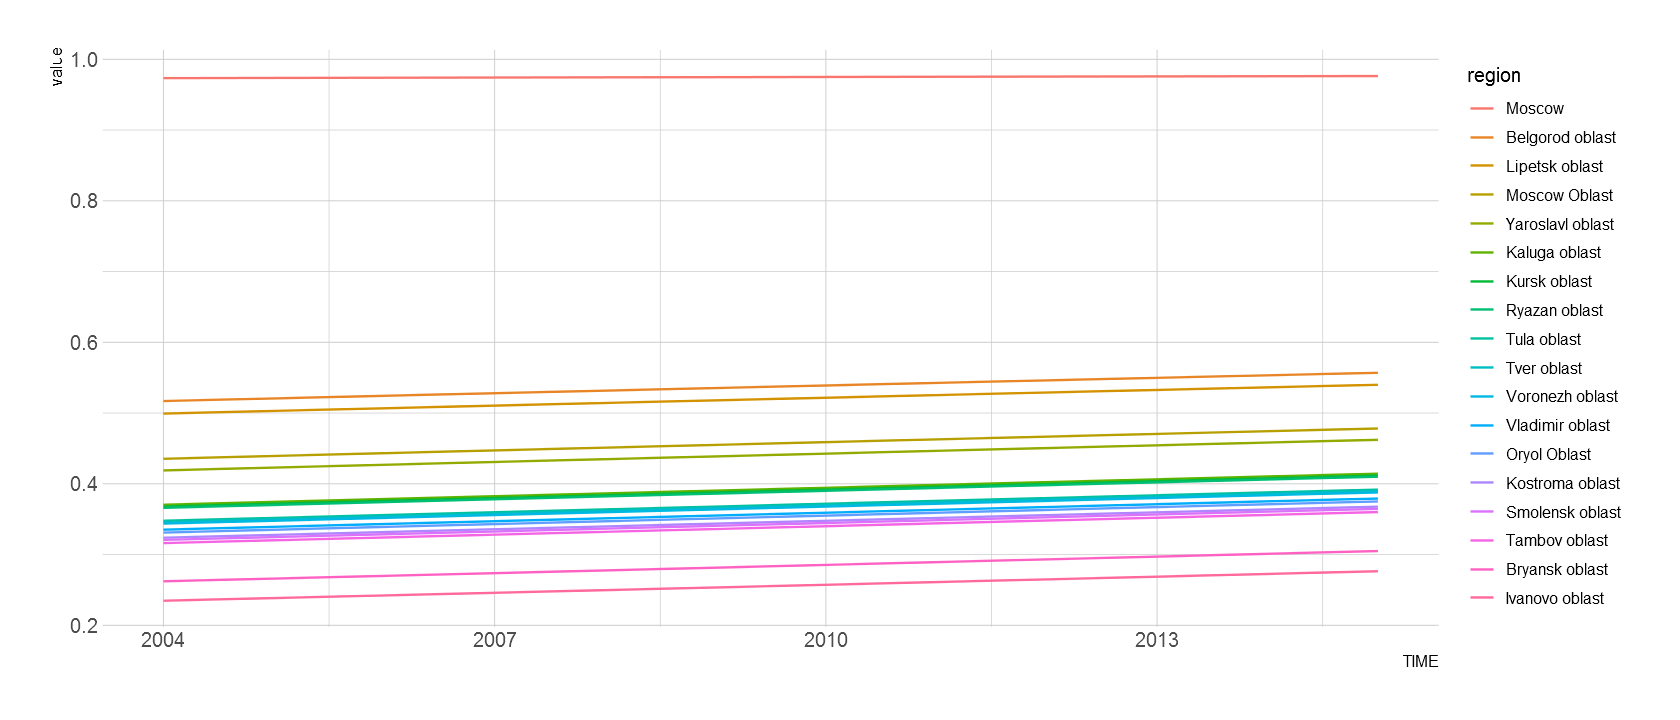

In [35]:
eff <- as.tibble(t(eff))
eff$TIME <- as.list(unique(df['TIME']))$TIME
eff_melt <- melt(eff ,  id.vars = 'TIME', variable.name = 'region')
ggplot(eff_melt, aes(TIME,value)) + geom_line(aes(colour = region))

Not surprisingly, Moscow is the most efficient region, but interestingly enough, it appears that there are some clusters of  regions grouped by their efficiencies, which may deserve a further investigation.

Let's summarise all the estimated models.

In [23]:
extract  <- function(model) {
      mod <- broom:::tidy.lm(model)
      coef <- mod$estimate
      coef.names <- as.character(mod$term)
      se <- mod$std.error
      pvalues <- mod$p.value
      lik <- list(model$mleLogl)
      result <- createTexreg(coef.names = coef.names,
                                        coef = coef,
                                        se = se,
                                        gof.names = 'logLik',
                                        gof = model$mleLogl,
                                        pvalues = pvalues)
      return(result)

}

In [35]:
models <- list(time_inv_no_change,
            time_inv_no_change_tn,
            time_inv,
            time_var_no_change,
            time_var)
models_extracted <- lapply(models, extract)


In [39]:
display_html(htmlreg(models_extracted, single.row = TRUE, stars = c(0.01, 0.05, 0.1), caption=""))

,Model 1,Model 2,Model 3,Model 4,Model 5
(Intercept),4.21 (0.71)***,3.61 (1.03)***,6.21 (1.19)***,6.65 (1.17)***,6.79 (1.22)***
log(ER),0.68 (0.20)***,0.65 (0.28)**,0.46 (0.22)**,0.47 (0.21)**,0.45 (0.23)**
log(INV),-0.00 (0.03),-0.08 (0.03)**,0.02 (0.03),0.02 (0.03),0.02 (0.03)
log(INC),0.60 (0.03)***,0.68 (0.03)***,0.50 (0.06)***,0.45 (0.07)***,0.45 (0.06)***
sigmaSq,0.58 (0.20)***,0.05 (0.01)***,0.84 (0.32)***,0.84 (0.31)***,0.86 (0.31)***
gamma,0.99 (0.00)***,0.85 (0.03)***,0.99 (0.00)***,0.99 (0.00)***,0.99 (0.00)***
mu,,0.41 (0.08)***,,,
TIME_ADJ,,,0.01 (0.00)**,,0.00 (0.01)
time,,,,0.01 (0.00)***,0.01 (0.01)*
logLik,187.69,185.18,189.41,190.55,190.60
